In [4]:
import numpy as np
from msmbuilder.decomposition import tICA
from sklearn.decomposition import PCA
from msmbuilder.example_datasets import FsPeptide
from msmbuilder.featurizer import DihedralFeaturizer
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
%matplotlib inline

def fetch_and_preprocess_data():
    ''' fetches FsPeptide data, featurizes using dihedral angles,
    and returns a list of matrices containing time-ordered observations'''
    trajectories = FsPeptide().get().trajectories
    X = DihedralFeaturizer().fit_transform(trajectories)
    return X

def plot_explained_variance(eigenvalues, y_label='Explained variance ratio'):
    eigenvalues = sorted(eigenvalues)[::-1]
    s_eigenvalues = sum(eigenvalues)

    plt.figure()
    ax = plt.subplot(1,2,1)
    plt.bar(range(1,len(eigenvalues)+1),eigenvalues / s_eigenvalues)
    plt.xlabel('Component index')
    plt.ylabel(y_label)
    plt.ylim(0,1)
    xa = ax.get_xaxis()
    xa.set_major_locator(plt.MaxNLocator(integer=True))
    plt.title('Per component')
    ax = plt.subplot(1,2,2)
    plt.fill_between(range(1,len(eigenvalues)+1),np.cumsum(eigenvalues) / s_eigenvalues,alpha=0.5)
    plt.xlabel('# of components included in model')
    plt.title('Whole model')
    xa = ax.get_xaxis()
    xa.set_major_locator(plt.MaxNLocator(integer=True))
    plt.ylim(0,1)

In [5]:
X = fetch_and_preprocess_data()

loading trajectory_1.xtc...
loading trajectory_10.xtc...
loading trajectory_11.xtc...
loading trajectory_12.xtc...
loading trajectory_13.xtc...
loading trajectory_14.xtc...
loading trajectory_15.xtc...
loading trajectory_16.xtc...
loading trajectory_17.xtc...
loading trajectory_18.xtc...
loading trajectory_19.xtc...
loading trajectory_2.xtc...
loading trajectory_20.xtc...
loading trajectory_21.xtc...
loading trajectory_22.xtc...
loading trajectory_23.xtc...
loading trajectory_24.xtc...
loading trajectory_25.xtc...
loading trajectory_26.xtc...
loading trajectory_27.xtc...
loading trajectory_28.xtc...
loading trajectory_3.xtc...
loading trajectory_4.xtc...
loading trajectory_5.xtc...
loading trajectory_6.xtc...
loading trajectory_7.xtc...
loading trajectory_8.xtc...
loading trajectory_9.xtc...


63


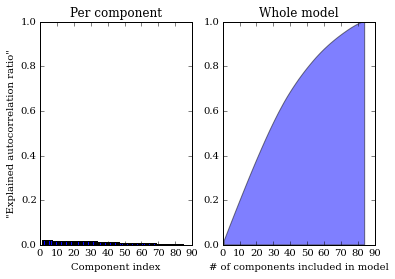

In [6]:
tica = tICA(lag_time=1)
tica.fit(X)
plot_explained_variance(tica.eigenvalues_,y_label='"Explained autocorrelation ratio"')
print(sum((np.cumsum(sorted(tica.eigenvalues_)[::-1]) / tica.eigenvalues_.sum())<0.90))

47


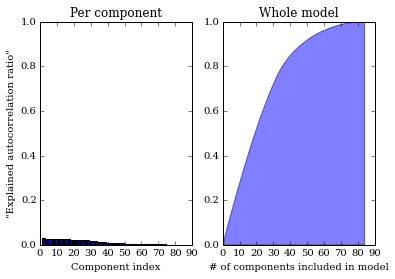

In [7]:
tica = tICA(lag_time=100)
tica.fit(X)
plot_explained_variance(tica.eigenvalues_,y_label='"Explained autocorrelation ratio"')
print(sum((np.cumsum(sorted(tica.eigenvalues_)[::-1]) / tica.eigenvalues_.sum())<0.90))

24


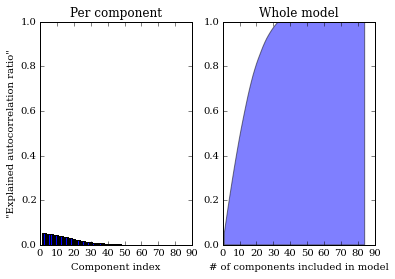

In [8]:
tica = tICA(lag_time=1000)
tica.fit(X)
plot_explained_variance(tica.eigenvalues_,y_label='"Explained autocorrelation ratio"')
print(sum((np.cumsum(sorted(tica.eigenvalues_)[::-1]) / tica.eigenvalues_.sum())<0.90))